### Importing Data

In [1]:
import pandas as pd

# Adding Weather Data.csv File
data = pd.read_csv('Weather Data.csv')

# Head of Data
print(data.head())

       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  


In [2]:
data.shape

(8784, 8)

In [3]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

### Deleting Date/Time Column and replace with Month, Day and Hour as Number

In [4]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

data['Month'] = data['Date/Time'].dt.month
data['Day'] = data['Date/Time'].dt.day

data = data.drop(columns=['Date/Time'])

print(data.head())

   Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
0    -1.8              -3.9         86                4            8.0   
1    -1.8              -3.7         87                4            8.0   
2    -1.8              -3.4         89                7            4.0   
3    -1.5              -3.2         88                6            4.0   
4    -1.5              -3.3         88                7            4.8   

   Press_kPa               Weather  Month  Day  
0     101.24                   Fog      1    1  
1     101.24                   Fog      1    1  
2     101.26  Freezing Drizzle,Fog      1    1  
3     101.27  Freezing Drizzle,Fog      1    1  
4     101.23                   Fog      1    1  


In [5]:
import pandas as pd
import calendar

# ترکیب ماه و روز
data['MonthDay'] = data['Month'] + (data['Day'] - 1) / data['Month'].apply(lambda x: calendar.monthrange(2012, x)[1])

# نمایش داده‌ها
print(data[['Month', 'Day', 'MonthDay']])


      Month  Day   MonthDay
0         1    1   1.000000
1         1    1   1.000000
2         1    1   1.000000
3         1    1   1.000000
4         1    1   1.000000
...     ...  ...        ...
8779     12   31  12.967742
8780     12   31  12.967742
8781     12   31  12.967742
8782     12   31  12.967742
8783     12   31  12.967742

[8784 rows x 3 columns]


In [6]:
print(data.columns)

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Weather', 'Month', 'Day', 'MonthDay'],
      dtype='object')


In [7]:
data = data.drop(columns=['Month'])
data = data.drop(columns=['Day'])

#### Getting to know Weather Column

In [8]:
print(data['Weather'].unique())
print('\n')
print(data['Weather'].value_counts())

['Fog' 'Freezing Drizzle,Fog' 'Mostly Cloudy' 'Cloudy' 'Rain'
 'Rain Showers' 'Mainly Clear' 'Snow Showers' 'Snow' 'Clear'
 'Freezing Rain,Fog' 'Freezing Rain' 'Freezing Drizzle' 'Rain,Snow'
 'Moderate Snow' 'Freezing Drizzle,Snow' 'Freezing Rain,Snow Grains'
 'Snow,Blowing Snow' 'Freezing Fog' 'Haze' 'Rain,Fog' 'Drizzle,Fog'
 'Drizzle' 'Freezing Drizzle,Haze' 'Freezing Rain,Haze' 'Snow,Haze'
 'Snow,Fog' 'Snow,Ice Pellets' 'Rain,Haze' 'Thunderstorms,Rain'
 'Thunderstorms,Rain Showers' 'Thunderstorms,Heavy Rain Showers'
 'Thunderstorms,Rain Showers,Fog' 'Thunderstorms' 'Thunderstorms,Rain,Fog'
 'Thunderstorms,Moderate Rain Showers,Fog' 'Rain Showers,Fog'
 'Rain Showers,Snow Showers' 'Snow Pellets' 'Rain,Snow,Fog'
 'Moderate Rain,Fog' 'Freezing Rain,Ice Pellets,Fog'
 'Drizzle,Ice Pellets,Fog' 'Drizzle,Snow' 'Rain,Ice Pellets'
 'Drizzle,Snow,Fog' 'Rain,Snow Grains' 'Rain,Snow,Ice Pellets'
 'Snow Showers,Fog' 'Moderate Snow,Blowing Snow']


Weather
Mainly Clear                             

#### Some of Data of Weather are combined, here we want to delete them

In [9]:
print(f"Number of Data that Contains ',' is: {data['Weather'].count()-data[~data['Weather'].str.contains(',', na=False)]['Weather'].count()}")

data = data[~data['Weather'].str.contains(',', na=False)]

print(f"Cleaned data shape: {data.shape}")

Number of Data that Contains ',' is: 372
Cleaned data shape: (8412, 8)


#### Result:

In [10]:
print(data['Weather'].value_counts())

Weather
Mainly Clear        2106
Mostly Cloudy       2069
Cloudy              1728
Clear               1326
Snow                 390
Rain                 306
Rain Showers         188
Fog                  150
Snow Showers          60
Drizzle               41
Haze                  16
Freezing Rain         14
Freezing Drizzle       7
Moderate Snow          4
Freezing Fog           4
Thunderstorms          2
Snow Pellets           1
Name: count, dtype: int64


#### Some of remain Weather conditions must be more clear

In [11]:
data['Weather'] = data['Weather'].replace({
    'Mainly Clear': 'Clear',
    'Mostly Cloudy': 'Cloudy',
    'Rain Showers': 'Rain',
    'Snow Showers': 'Snow',
    'Freezing Rain': 'Rain',
    'Freezing Drizzle': 'Drizzle',
    'Moderate Snow': 'Snow',
    'Freezing Fog': 'Fog',
    'Snow Pellets': 'Snow'
})

print(f"Updated Weather column:\n {data['Weather'].unique()}")

Updated Weather column:
 ['Fog' 'Cloudy' 'Rain' 'Clear' 'Snow' 'Drizzle' 'Haze' 'Thunderstorms']


#### Result:


In [12]:
print(data['Weather'].value_counts())

Weather
Cloudy           3797
Clear            3432
Rain              508
Snow              455
Fog               154
Drizzle            48
Haze               16
Thunderstorms       2
Name: count, dtype: int64


#### Removing the rows with condition in Weather less than 10

In [13]:
data = data[data['Weather'].isin(data['Weather'].value_counts()[data['Weather'].value_counts() >= 10].index)]

#### Result

In [14]:
print(data['Weather'].value_counts())

Weather
Cloudy     3797
Clear      3432
Rain        508
Snow        455
Fog         154
Drizzle      48
Haze         16
Name: count, dtype: int64


#### Adding 'Weather Code' Column to Coding Weather condition

In [15]:
data['Weather Code'] = data['Weather'].astype('category').cat.codes

print(data.head())

   Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
0    -1.8              -3.9         86                4            8.0   
1    -1.8              -3.7         87                4            8.0   
4    -1.5              -3.3         88                7            4.8   
5    -1.4              -3.3         87                9            6.4   
6    -1.5              -3.1         89                7            6.4   

   Press_kPa Weather  MonthDay  Weather Code  
0     101.24     Fog       1.0             3  
1     101.24     Fog       1.0             3  
4     101.23     Fog       1.0             3  
5     101.27     Fog       1.0             3  
6     101.29     Fog       1.0             3  


#### Creating a dictionary for Undrestanding Weather Condition Name

In [16]:
weather_dict = dict(zip(data['Weather Code'], data['Weather']))

In [17]:
weather_dict

{3: 'Fog',
 1: 'Cloudy',
 5: 'Rain',
 0: 'Clear',
 6: 'Snow',
 2: 'Drizzle',
 4: 'Haze'}

#### Deleting Weather Column

In [18]:
data = data.drop(columns=['Weather'])

print(data.head())

   Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
0    -1.8              -3.9         86                4            8.0   
1    -1.8              -3.7         87                4            8.0   
4    -1.5              -3.3         88                7            4.8   
5    -1.4              -3.3         87                9            6.4   
6    -1.5              -3.1         89                7            6.4   

   Press_kPa  MonthDay  Weather Code  
0     101.24       1.0             3  
1     101.24       1.0             3  
4     101.23       1.0             3  
5     101.27       1.0             3  
6     101.29       1.0             3  


### Our Final Data is:

In [19]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8410 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temp_C            8410 non-null   float64
 1   Dew Point Temp_C  8410 non-null   float64
 2   Rel Hum_%         8410 non-null   int64  
 3   Wind Speed_km/h   8410 non-null   int64  
 4   Visibility_km     8410 non-null   float64
 5   Press_kPa         8410 non-null   float64
 6   MonthDay          8410 non-null   float64
 7   Weather Code      8410 non-null   int8   
dtypes: float64(5), int64(2), int8(1)
memory usage: 533.8 KB
None


In [20]:
data

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,MonthDay,Weather Code
0,-1.8,-3.9,86,4,8.0,101.24,1.000000,3
1,-1.8,-3.7,87,4,8.0,101.24,1.000000,3
4,-1.5,-3.3,88,7,4.8,101.23,1.000000,3
5,-1.4,-3.3,87,9,6.4,101.27,1.000000,3
6,-1.5,-3.1,89,7,6.4,101.29,1.000000,3
...,...,...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13,12.967742,6
8780,0.2,-2.4,83,24,9.7,100.03,12.967742,6
8781,-0.5,-1.5,93,28,4.8,99.95,12.967742,6
8782,-0.2,-1.8,89,28,9.7,99.91,12.967742,6


### Ploting Correlation Matrix Heatmap



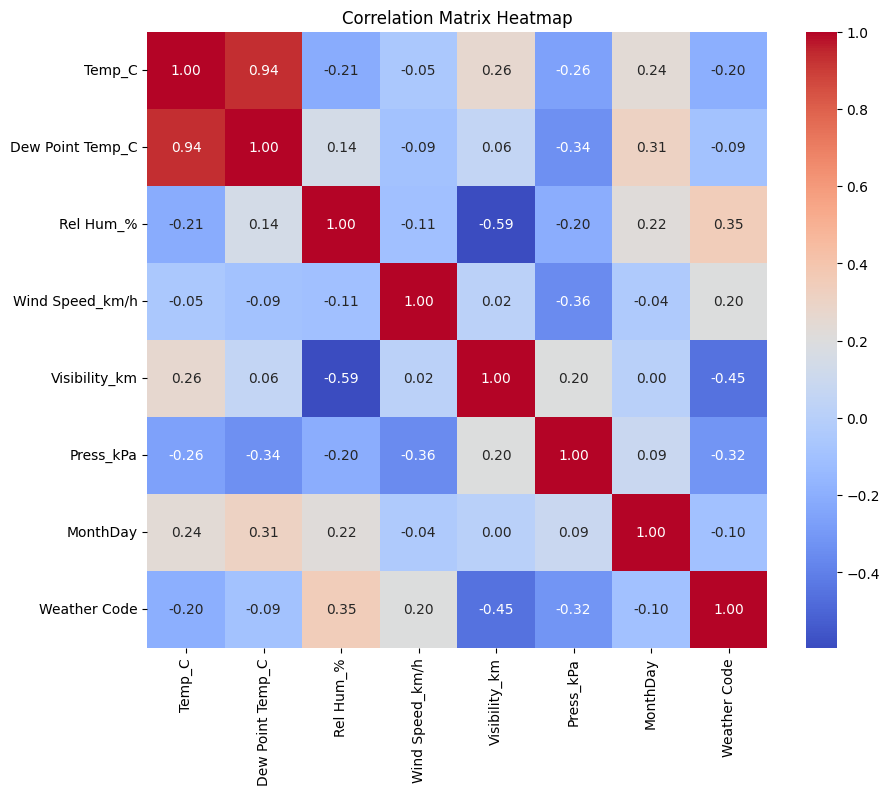

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ploting Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Spliting Features and Target

In [22]:
X = data.drop(['Weather Code'], axis=1)
y = data['Weather Code']

### Using GaussianHMM model

In [23]:
from hmmlearn.hmm import GaussianHMM

# Turn Data to 2D
X = np.array(X)

# Using GaussianHMM to model continuous data
model = GaussianHMM(n_components=10, covariance_type="full", n_iter=1000)

### Fitting Model And Predict States

In [24]:
model.fit(X)

# Predict Hidden States
hidden_states = model.predict(X)

In [25]:
# نمایش اطلاعات مربوط به مدل
print("Transition Matrix:")
print(np.round(model.transmat_, decimals=2))

Transition Matrix:
[[0.87 0.   0.11 0.01 0.   0.   0.   0.   0.   0.  ]
 [0.   0.97 0.01 0.   0.02 0.   0.   0.   0.   0.  ]
 [0.04 0.02 0.75 0.16 0.01 0.01 0.   0.01 0.   0.  ]
 [0.   0.   0.03 0.83 0.06 0.02 0.   0.   0.01 0.05]
 [0.11 0.02 0.01 0.05 0.76 0.   0.   0.04 0.   0.01]
 [0.   0.   0.01 0.08 0.01 0.89 0.   0.   0.01 0.01]
 [0.   0.   0.   0.   0.01 0.   0.91 0.07 0.01 0.  ]
 [0.   0.   0.   0.   0.04 0.   0.04 0.9  0.01 0.  ]
 [0.   0.   0.   0.02 0.02 0.   0.   0.03 0.93 0.  ]
 [0.   0.01 0.   0.05 0.06 0.   0.   0.   0.   0.89]]


#### The first row of the transition matrix shows the probabilities of transitioning from state 0 to other states. The model has an 83% chance of staying in state 0, an 3% chance of transitioning to state 1, and very low probabilities for transitioning to other states.

### Spliting data into train and test. Data is Imbalance

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  #Stratified Sampling
)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"\nClass distribution in training data: {y_train.value_counts()}")
print(f"\nClass distribution in test data: {y_test.value_counts()}")

Training data shape: (6728, 7)
Test data shape: (1682, 7)

Class distribution in training data: Weather Code
1    3038
0    2746
5     406
6     364
3     123
2      38
4      13
Name: count, dtype: int64

Class distribution in test data: Weather Code
1    759
0    686
5    102
6     91
3     31
2     10
4      3
Name: count, dtype: int64


### Using Different Classifiers and Checking Their Accuracy

In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier(n_estimators=1000, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy of the XGBoost model: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Accuracy of the XGBoost model: 77.94%


In [28]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy of the Gradient Boosting model: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Accuracy of the Gradient Boosting model: 75.39%


In [29]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy of the KNN model: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Accuracy of the KNN model: 60.82%


In [30]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print(f"Accuracy of the model: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Accuracy of the model: 77.94%


### Random Forest Classifier was the best

### Validation

In [31]:
from hmmlearn.hmm import GaussianHMM
import numpy as np

X_test = np.array(X_test)
print(f"Predicted hidden states for the test set: {model.predict(X_test)}")
print(f"Predicted labels for the test set: {model.predict(X_test)}")

Predicted hidden states for the test set: [1 0 1 ... 1 6 0]
Predicted labels for the test set: [1 0 1 ... 1 6 0]


### Accuracy For our Model

In [32]:
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7794292508917955


### Plotting Validation

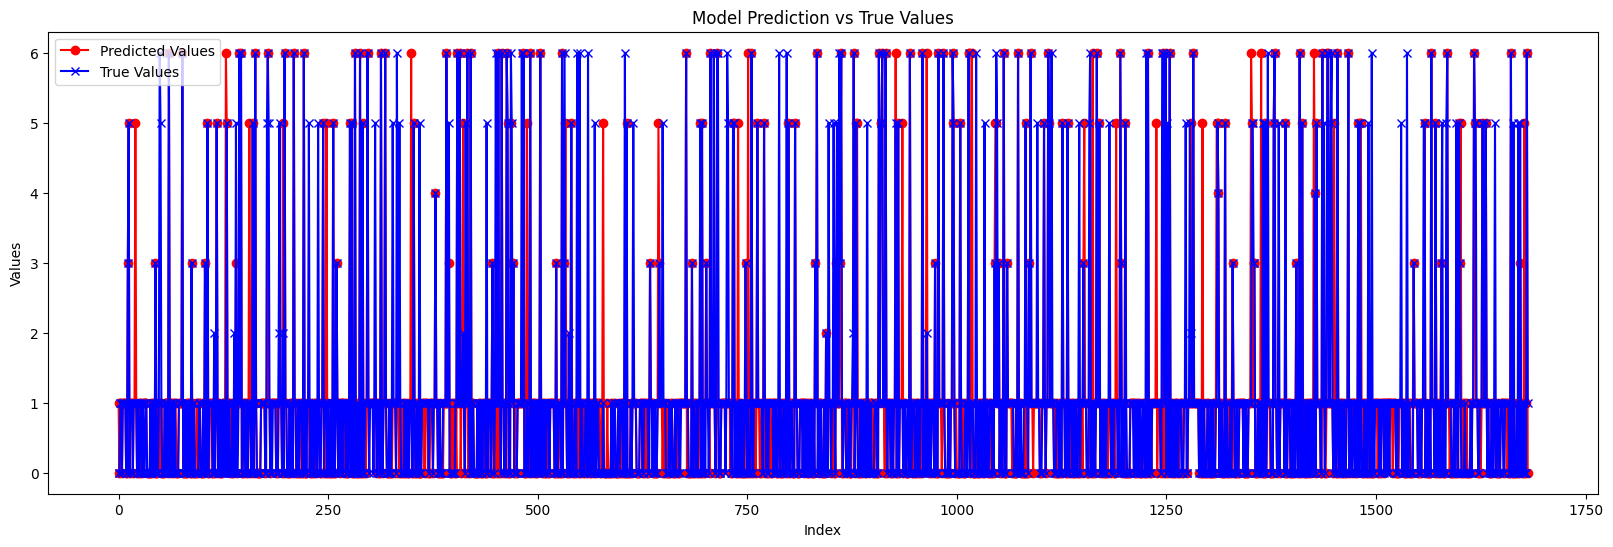

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(y_pred, label='Predicted Values', marker='o', linestyle='-', color='r')
plt.plot(y_test.values, label='True Values', marker='x', linestyle='-', color='b')
plt.title('Model Prediction vs True Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

### Confusion Matrix

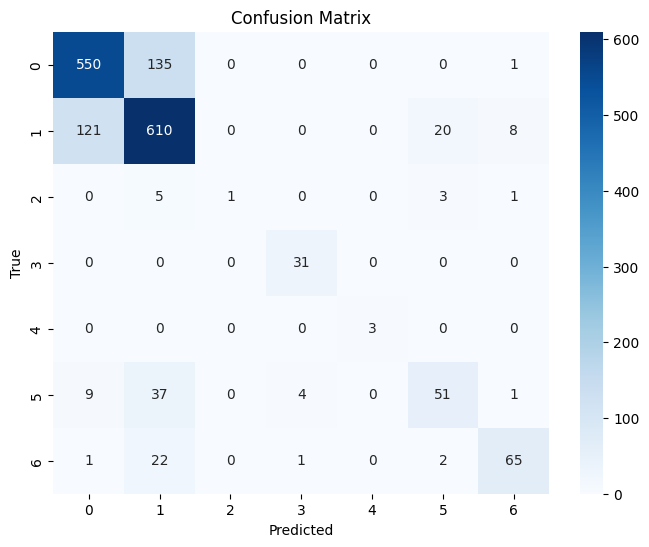

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Calculating Precision and Recall

In [35]:
from sklearn.metrics import precision_score, recall_score

print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")

Precision: 0.8498685765088944
Recall: 0.70281772142591


### Calculating F1 Score

In [36]:
from sklearn.metrics import f1_score

print(f"F1 Score: {f1_score(y_test, y_pred, average='macro')}")

F1 Score: 0.7202015924577807


### classification_report

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       686
           1       0.75      0.80      0.78       759
           2       1.00      0.10      0.18        10
           3       0.86      1.00      0.93        31
           4       1.00      1.00      1.00         3
           5       0.67      0.50      0.57       102
           6       0.86      0.71      0.78        91

    accuracy                           0.78      1682
   macro avg       0.85      0.70      0.72      1682
weighted avg       0.78      0.78      0.78      1682

